## Data Preparation

In [1]:
# Imports and Dependencies 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Maximize column display

pd.set_option('display.max_columns', None)

In [3]:
# Read `crypto_data.csv` into Pandas

df = pd.read_csv('crypto_data.csv')
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
#Inspect Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [5]:
# Discard all cryptocurrencies that are not being traded 

df = df[df['IsTrading'] == True]
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
# Drop the `IsTrading` column from the dataframe
df = df.drop(columns ='IsTrading')

In [7]:
# Remove all rows that have at least one null value

df = df.dropna()
df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [8]:
#Filter for cryptocurrencies that have been mined. 
#Note: the total coins mined should be greater than zero.

df = df[df["TotalCoinsMined"]> 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(5)
memory usage: 29.1+ KB


In [9]:
# Delete the `CoinName` from the original dataframe
# Note: Data should be numeric

df.drop(columns='CoinName', axis=1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   Algorithm        532 non-null    object 
 2   ProofType        532 non-null    object 
 3   TotalCoinsMined  532 non-null    float64
 4   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(4)
memory usage: 24.9+ KB


In [10]:
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [11]:
# Convert`Algorithm` and `ProofType`, into numerical data.

X = pd.get_dummies(data=df, columns=["Algorithm", "ProofType"])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,Algorithm_CryptoNight,Algorithm_CryptoNight Heavy,Algorithm_CryptoNight-V7,Algorithm_Cryptonight-GPU,Algorithm_DPoS,Algorithm_Dagger,Algorithm_Dagger-Hashimoto,Algorithm_ECC 256K1,Algorithm_Equihash,Algorithm_Equihash+Scrypt,Algorithm_Ethash,Algorithm_Exosis,Algorithm_Green Protocol,Algorithm_Groestl,Algorithm_HMQ1725,Algorithm_HybridScryptHash256,Algorithm_IMesh,Algorithm_Jump Consistent Hash,Algorithm_Keccak,Algorithm_Leased POS,Algorithm_Lyra2RE,Algorithm_Lyra2REv2,Algorithm_Lyra2Z,Algorithm_M7 POW,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Ouroboros,Algorithm_PHI1612,Algorithm_POS 2.0,Algorithm_POS 3.0,Algorithm_PoS,Algorithm_Proof-of-Authority,Algorithm_Proof-of-BibleHash,Algorithm_QUAIT,Algorithm_QuBit,Algorithm_Quark,Algorithm_SHA-256,Algorithm_SHA-256 + Hive,Algorithm_SHA-256D,Algorithm_SHA-512,Algorithm_SHA3,Algorithm_Scrypt,Algorithm_Semux BFT consensus,Algorithm_Shabal256,Algorithm_Skein,Algorithm_SkunkHash,Algorithm_SkunkHash v2 Raptor,Algorithm_Stanford Folding,Algorithm_TRC10,Algorithm_Time Travel,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN,ProofType_DPOS,ProofType_DPoS,ProofType_HPoW,ProofType_LPoS,ProofType_POBh,ProofType_PoA,ProofType_PoC,ProofType_PoS,ProofType_PoS/LPoS,ProofType_PoS/PoW,ProofType_PoS/PoW/PoT,ProofType_PoST,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW and PoS,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#Standardize dataset so columns with larger values do not unduly influence the outcome

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(532, 98)

## Dimensionality Reduction

In [13]:
#Perform dimensionality reduction with PCA

pca = PCA(n_components=.90)
principal_components = pca.fit_transform(X_scaled)
print(f" The principal component's shape is {principal_components.shape}")
print(f" The principal component's variance is {pca.explained_variance_.sum()}")

 The principal component's shape is (532, 74)
 The principal component's variance is 88.47283457566151


In [14]:
#Reduce the dataset dimensions with t-SNE and visually inspect the results

tsne = TSNE(perplexity=45)
tsne_feature = tsne.fit_transform(principal_components)
tsne_feature.shape

(532, 2)

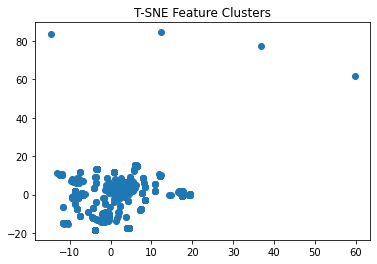

In [15]:
# Plot T-SNE features

X = tsne_feature[:,0]
y = tsne_feature[:,1]

# Display Plot

plt.scatter(X,y)
plt.title("T-SNE Feature Clusters")
plt.show()

## Cluster Analysis with k-Means

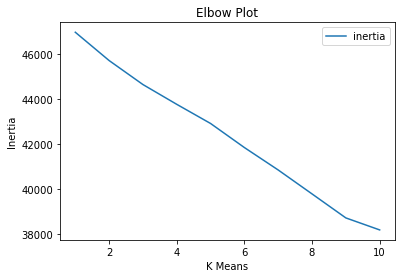

In [16]:
#Create an elbow plot to identify the best number of clusters

inertia = []
k = list(range(1,11))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

elbow_df = pd.DataFrame({"k": k, "inertia": inertia})
elbow_df.plot.line(x="k", y="inertia")
plt.xlabel("K Means")
plt.ylabel("Inertia")
plt.title("Elbow Plot")

plt.show()

## Recommendation(s)

Can the cryptocurrencies be clustered together? If so, into how many clusters?

Yes, based upon the preceding analysis there is only one cluster. Furthermore, there is no clear elbow, which may indicate that the used algorithm cannot separate the clusters. Therefore, another algorithm may be used to establish different results. 